# Chapter 17: Derivations

What's a *Derivation* ?

There is a high level representation of a music21 score(inner objects not be available)

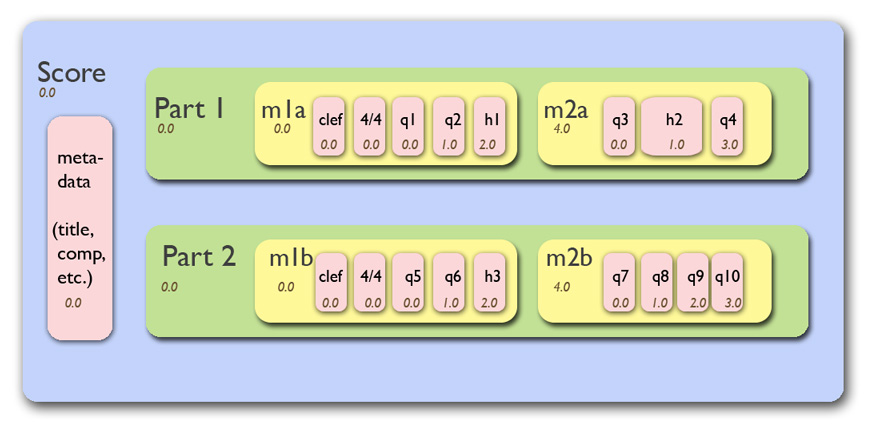

We need to flatten it to see the non-stream elements(measures,notes,etc)

by *Stream.flatten()* method

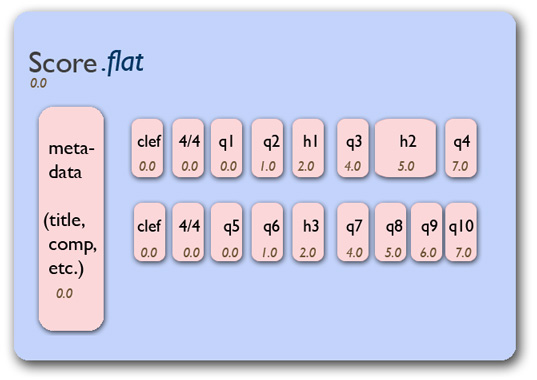

The relationship between the two is called a ***Derivation***

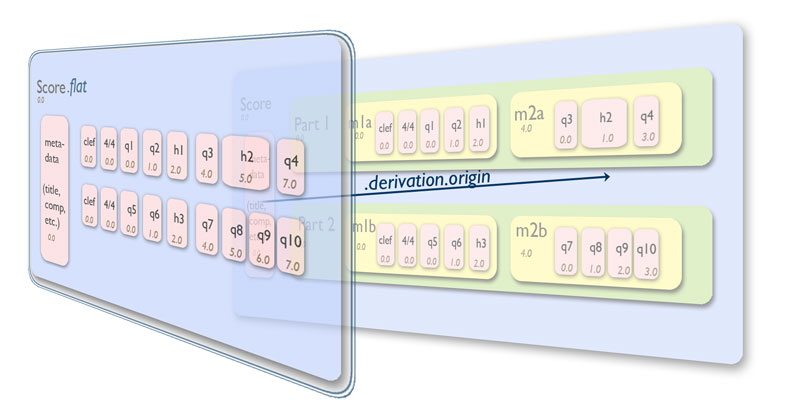

In [1]:
from music21 import *

In [2]:
s = corpus.parse('mozart/k80', 1)
s.id = 'mozartK80'
s.derivation
# This Score is the first Stream representing this piece in music21 so it has no derivation origin

<Derivation of <music21.stream.Score mozartK80> from None>

let’s look at the first couple of measures of the piece using *.measures*

In [3]:
sExcerpt = s.measures(1, 4)
sExcerpt.id = 'excerpt'
sExcerpt.show('xml')

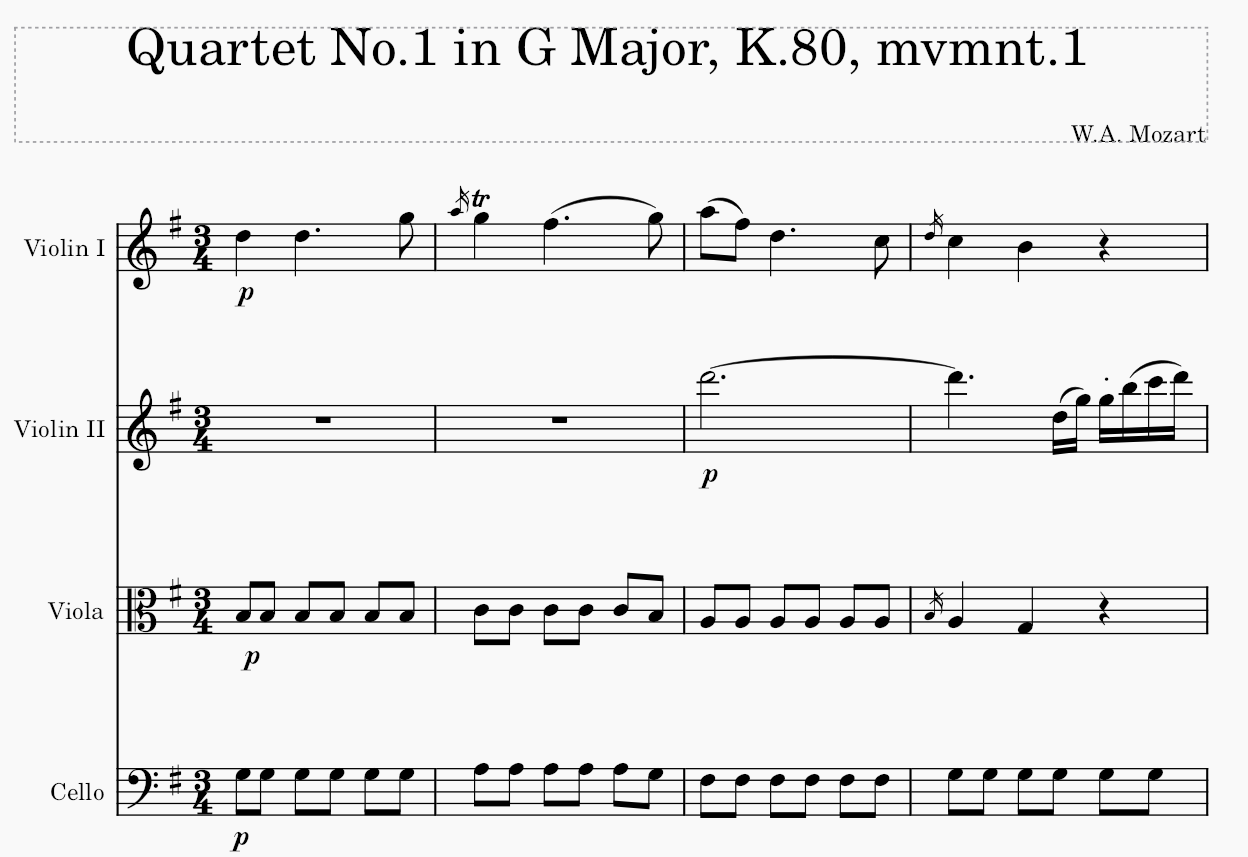

This excerpt has a more interesting *.derivation*

In [4]:
sExcerpt.derivation
# three things : the client, the origin, and the method

<Derivation of <music21.stream.Score excerpt> from <music21.stream.Score mozartK80> via 'measures'>

In [5]:
sTransposed = sExcerpt.transpose('P4')
sTransposed.show('xml')

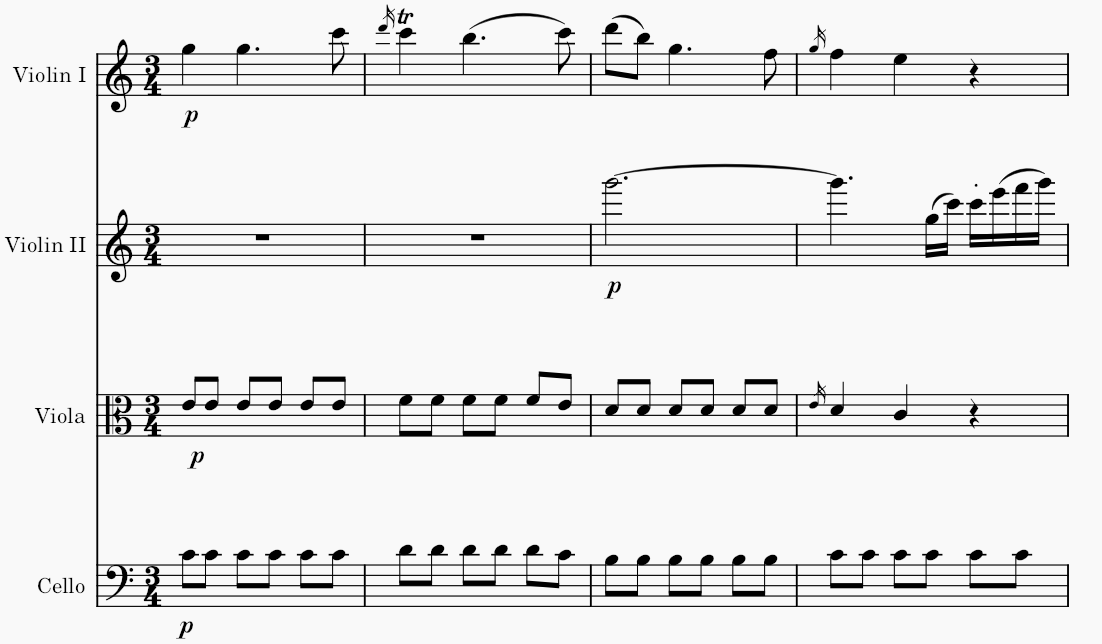

In [6]:
sTransposed.id = 'transposed'
sTransposed.derivation

<Derivation of <music21.stream.Score transposed> from <music21.stream.Score excerpt> via 'transpose'>

 If we wanted to know where everything came from, we can use the *.rootDerivation* property

In [7]:
sTransposed.derivation.origin

<music21.stream.Score excerpt>

In [8]:
sTransposed.derivation.origin.derivation.origin

<music21.stream.Score mozartK80>

In [9]:
sTransposed.derivation.rootDerivation

<music21.stream.Score mozartK80>

know the whole history of where this Stream comes from by *.chain()* method

In [10]:
for previousScore in sTransposed.derivation.chain():
    print(previousScore)

<music21.stream.Score excerpt>
<music21.stream.Score mozartK80>


### There are good uses for the derivation chain

 change every *piano* mark to a *forte* (loud)

In [11]:
def makeLouder(s):
    for dyn in s.recurse().getElementsByClass('Dynamic'):
        dyn.value = 'f'

makeLouder(sTransposed)
sTransposed.show('xml')

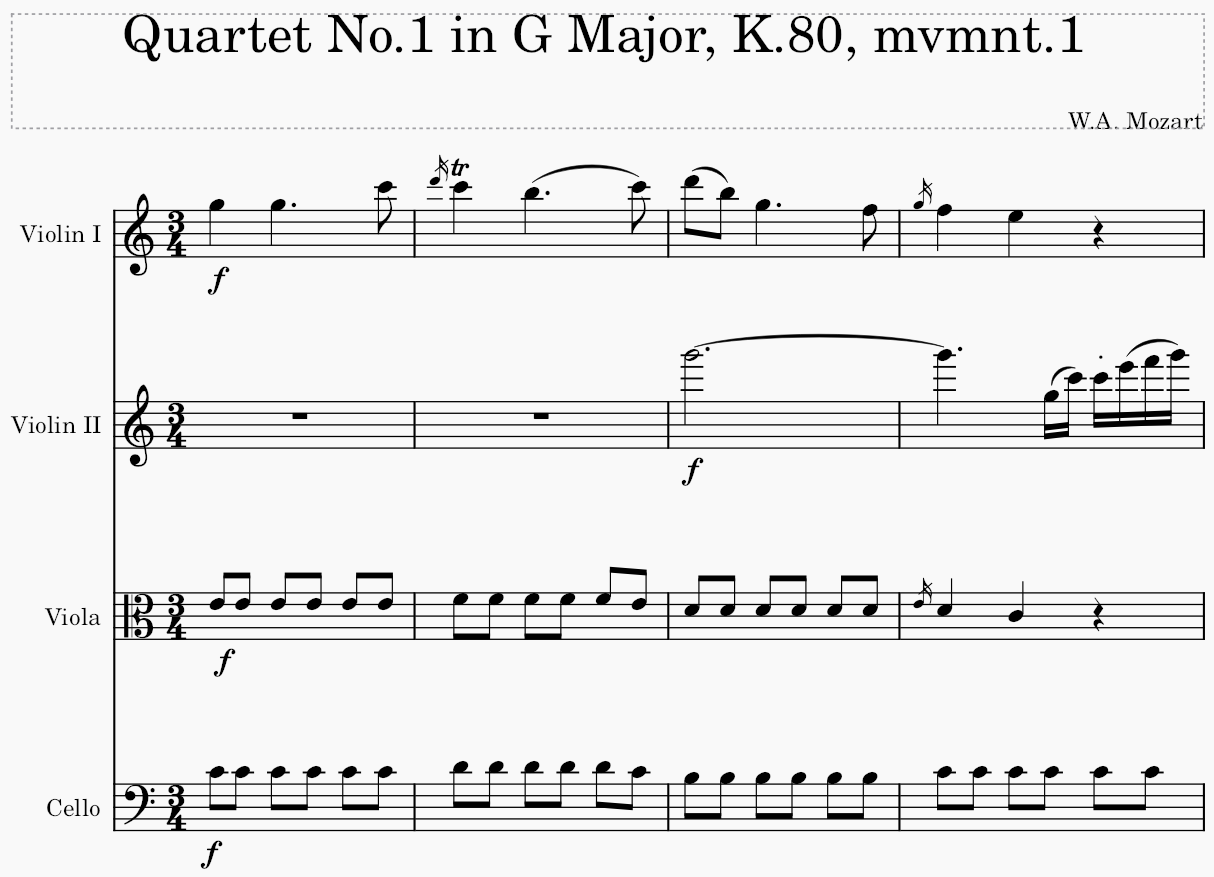

That’s pretty cool, but our original score is unchanged

In [12]:
sExcerpt.show('xml')

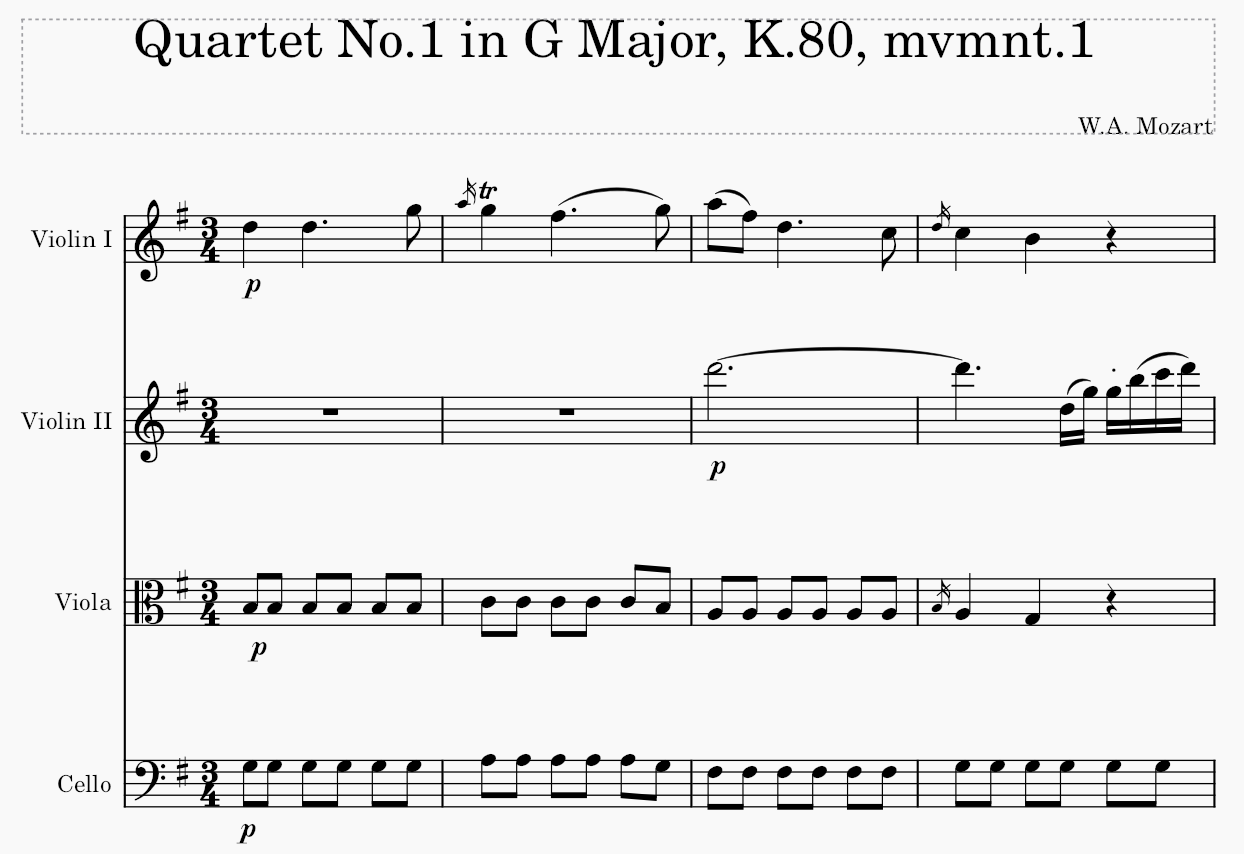

backtrack up the history of the score

In [13]:
for s in sTransposed.derivation.chain():
    makeLouder(s)

sExcerpt.show('xml')

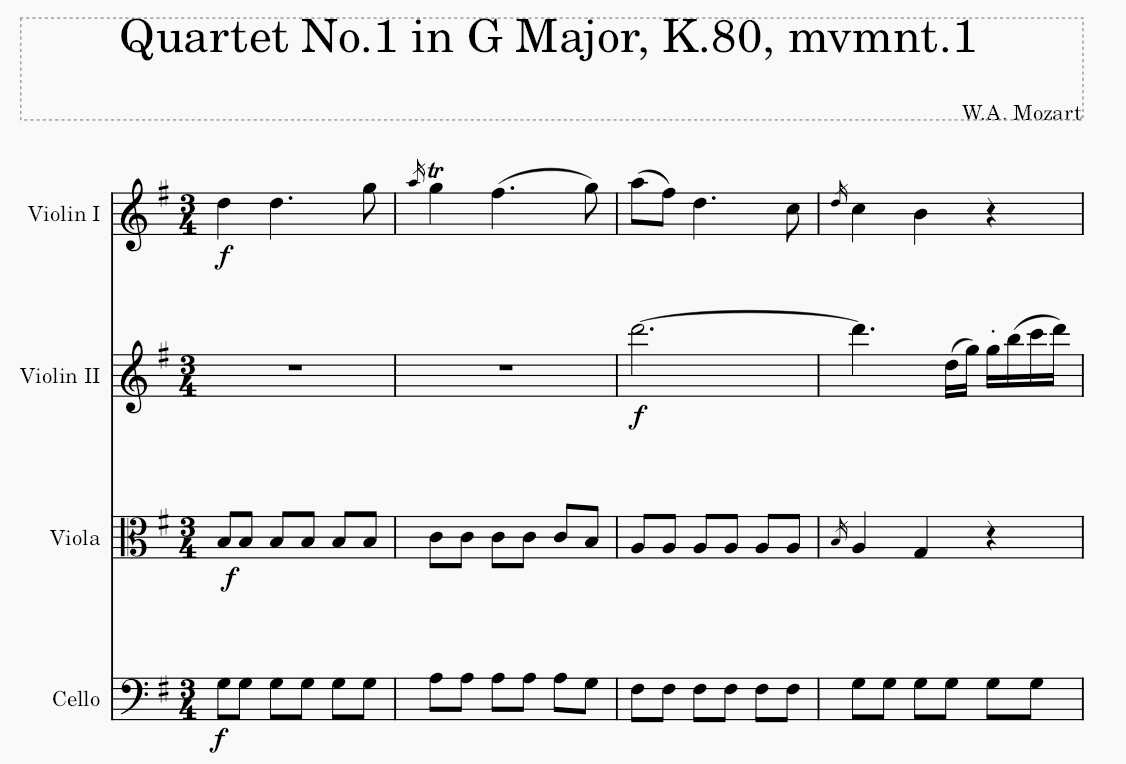